# Projet_ED2
Projet de Mathématiques - Équations Différentielles II

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Jusqu'à présent, on a présenté des schémas dépendant de pas de temps $\Delta t_j$, sans jamais dire comment les choisir. Le plus simple est de choisir un pas $\Delta t$ fixe mais il est difficile de savoir à l'avance quel pas est nécessaire. En particulier, comment savoir si la solution obtenue est suffisamment précise, sans connaître la vraie ?

## Pas fixe

Une voie empirique est de fixer un pas, lancer la simulation, puis fixer un pas plus petit, relancer la simulation, jusqu'à ce que les resultats ne semble plus changer (au sens de ce qui nous intéresse d'observer). Notons que la connaissance des constantes de temps présentes dans le système peut aider à fixer un premier ordre de grandeur du pas. On pourrait aussi directement choisir le pas $\Delta t_{opt}$ obtenu plus haut en prenant en compte les erreurs d'arrondis. Mais les constantes $c_v$ et $S(T)$ sont souvent mal connues et conservatives.

### Consigne
Coder une fonction

`def solve_euler_explicit(f, x0, dt):
...
return (t, x)`

prenant en entrée une fonction $f$, une condition initiale $x_0$ et un pas de temps $dt$, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(x)$. Tester les performances de votre solver sur une équation différentielle que vous savez résoudre. Illustrer la convergence du schéma à l'ordre 1.

#### Remarque
On rajoute un argument `tf` correspondant au temps final de la simulation (en sous entendant un départ à $x_0$ en $t = 0$)

In [3]:
def solve_euler_explicit(f, x0, dt, tf):
    n = int(tf//dt) #Nombre de passage dans la boucles
    t, x = np.empty(n), np.empty((n,x0.shape[0])) #On intialise des tableaux vides. 
    #Le temps est forcément un vecteur, alors que x peut être une matrice comme x0 peut avoir plusieurs coordonées.
    x[0] = x0 #On fixe la valeur de x0 (t0 étant déjà par défaut à 0)
    
    for i in range(n-1):
        t[i+1], x[i+1] = t[i] + dt, x[i] + f(x[i])*dt
    return (t,x)

#### Illustration du schéma
On illustre le schéma avec deux équations différentielles simples :
- $\dot{x} = x$ et $x_0 = 1$, qui se résout en $x = exp$. On a alors $f : x \mapsto x$
- $\ddot{x} + x = 0$ et $(x_0, v_0) = (0,1)$, qui se résout en $x = sin$. On a alors $f = \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}$, ou autrement $f : (x_1,x_2) \mapsto (x_2, -x_1)$

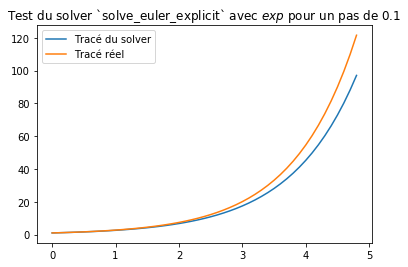

In [4]:
#Exponentielle
T, X = solve_euler_explicit(lambda x: x, np.array([1]), 10**-1, 5)
X_Theo = np.exp(T)
plt.plot(T,X, label="Tracé du solver")
plt.plot(T,X_Theo, label="Tracé réel")
plt.title("Test du solver `solve_euler_explicit` avec $exp$ pour un pas de 0.1")
plt.legend()
plt.show()

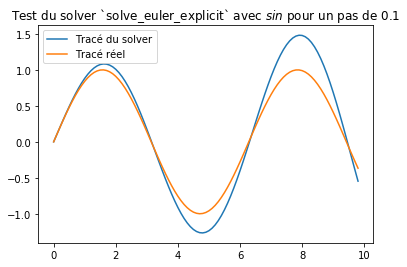

In [5]:
#Sinus
T, Y = solve_euler_explicit(lambda X: np.array((X[1],-X[0])), np.array([0,1]), 10**-1, 10)
X = Y[:,0] #On ne récupère que la position
X_Theo = np.sin(T)
plt.plot(T,X, label="Tracé du solver")
plt.plot(T,X_Theo, label="Tracé réel")
plt.title("Test du solver `solve_euler_explicit` avec $sin$ pour un pas de 0.1")
plt.legend()
plt.show()

#### Mise en évidence de l'ordre 1
La définition de la convergence d'une méthode d'ordre $p$ est la suivante :
$$ E_{\Delta t} = \max_{1 \leq j \leq J} |x^j - x(t_j)| \leq c_v (\Delta t)^{p} $$
Autrement dit dans le cas de l'ordre 1, la plus grosse erreur absolue en un temps donné est toujours inférieur à $\Delta t$ multiplié par une constante $c_v$, qui est indépendante de $\Delta t$.

On se propose donc de définir une fonction `E` qui en prenant comme paramètre $\Delta t$ retourne la plus grande erreur absolue $E_{\Delta t}$.

On trace alors $E_{\Delta t}$ pour différentes valeur de $\Delta t$ et l'on vérifie que l'erreur se comporte linéairement, traduisant l'ordre 1.

Afin de pouvoir réutiliser ce code plus tard, on utilise une fonction `create_E` qui créer la fonction `E` avec le solver de notre choix. On travaillera avec l'exponentielle dans le cas présent.

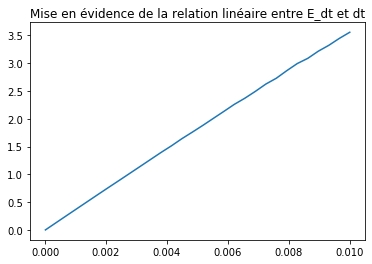

In [6]:
def create_E(solver):
    def E(dt):
        T, X = solver(lambda x: x, np.array([1]), dt, 5)
        X_Theo = np.exp(T)
        return max(abs(X_Theo-X[:,0]))
    return E
E = create_E(solve_euler_explicit)
DT = np.linspace(10**-5, 10**-2, 30)
Ev = np.vectorize(E)
plt.plot(DT, Ev(DT))
plt.title("Mise en évidence de la relation linéaire entre E_dt et dt")
plt.show()

### Consigne
Faire de même et comparer la convergence avec un schéma d'ordre 2 de votre choix.

In [7]:
def solve_heun(f, x0, dt, tf):
    n = int(tf//dt) #Nombre de passage dans la boucles
    t, x = np.empty(n), np.empty((n,x0.shape[0])) #On intialise des tableaux vides. 
    #Le temps est forcément un vecteur, alors que x peut être une matrice comme x0 peut avoir plusieurs coordonées.
    x[0] = x0 #On fixe la valeur de x0 (t0 étant déjà par défaut à 0)
    
    for i in range(n-1):
        t[i+1], x[i+1] = t[i] + dt, x[i] + dt/2 * (f(x[i]) + f(x[i] + dt*f(x[i])))
    return (t,x)

#### Illustration du schéma de Heun et comparaison avec Euler

De la même façon que précédemment, on teste notre nouveau solver avec des exemples simples. La schéma de Heun étant déjà bien plus précis, on passe à un pas de 0.3 au lieu de 0.1

On en profite pour comparer les deux solvers dans les même conditions, ce qui fait déjà ressortir la précision supérieur du schéma de Heun.

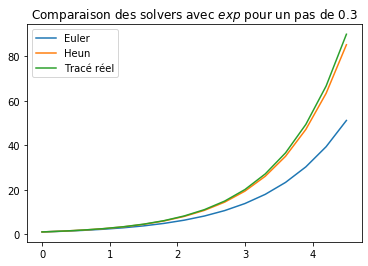

In [8]:
#Exponentielle sur [0;5]
T, X1 = solve_euler_explicit(lambda x: x, np.array([1]), 0.3, 5)
T, X2 = solve_heun(lambda x: x, np.array([1]), 0.3, 5)
X_Theo = np.exp(T)
plt.plot(T,X1, label="Euler")
plt.plot(T,X2, label="Heun")
plt.plot(T,X_Theo, label="Tracé réel")
plt.title("Comparaison des solvers avec $exp$ pour un pas de 0.3")
plt.legend()
plt.show()

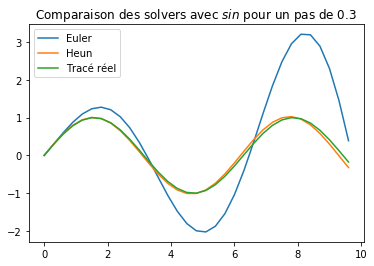

In [9]:
#Sinus sur [0;10]
T, Y1 = solve_euler_explicit(lambda X: np.array((X[1],-X[0])), np.array([0,1]), 0.3, 10)
X1 = Y1[:,0] #On ne récupère que la position
T, Y2 = solve_heun(lambda X: np.array((X[1],-X[0])), np.array([0,1]), 0.3, 10)
X2 = Y2[:,0] #On ne récupère que la position
X_Theo = np.sin(T)
plt.plot(T,X1, label="Euler")
plt.plot(T,X2, label="Heun")
plt.plot(T,X_Theo, label="Tracé réel")
plt.title("Comparaison des solvers avec $sin$ pour un pas de 0.3")
plt.legend()
plt.show()

#### Mise en évidence de l'ordre 2 pour le schéma de Heun
Le code est indentique à précédemment, à l'exception près que l'on rajoute une racine carré pour mettre en évidence l'ordre 2. En effet, il est bien plus facile pour l'oeil humain de distinguer une belle droite d'une belle parabole

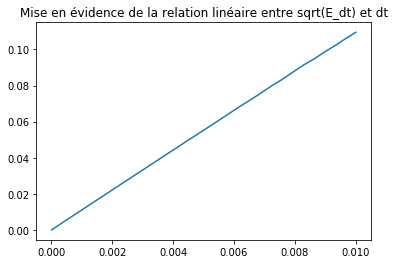

In [10]:
E = create_E(solve_heun)
DT = np.linspace(10**-5, 10**-2, 30)
Ev = np.vectorize(E)
plt.plot(DT, np.sqrt(Ev(DT)))
plt.title("Mise en évidence de la relation linéaire entre sqrt(E_dt) et dt")
plt.show()

#### Complément : avec le solver de Python
On utilise la fonction `odeint` de la librairie `scipy.integrate`.

In [11]:
from scipy.integrate import odeint 

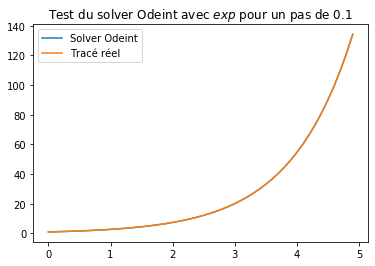

In [12]:
# Exponentielle sur [0; 5]
def F(x, t):
    return x

T = np.arange(0, 5, 0.1)
X = odeint(F, 1, T)
X_theo = np.exp(T)
plt.plot(T,X, label="Solver Odeint")
plt.plot(T,X_theo, label="Tracé réel")
plt.title("Test du solver Odeint avec $exp$ pour un pas de 0.1")
plt.legend()
plt.show()

On voit que les deux méthodes donnent un tracé confondu.

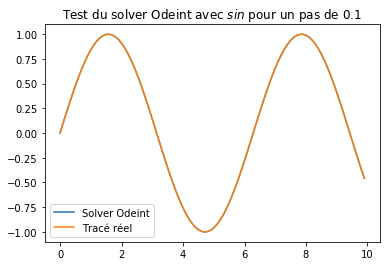

In [13]:
# Sinus sur [0; 10]
def F(Y, t):
    x, xp = Y
    return np.array([xp, - x])

T = np.arange(0, 10, 0.1)
X = odeint(F, [0, 1], T)
x, xp = X[:, 0], X[ :, 1]
X_theo = np.sin(T)
plt.plot(T,x, label="Solver Odeint")
plt.plot(T,X_theo, label="Tracé réel")
plt.title("Test du solver Odeint avec $sin$ pour un pas de 0.1")
plt.legend()
plt.show()

De la même façon, les tracés sont confondus.

Cela nous permet d'introduire la partie suivante qui s'appuie sur le fonctionnement des solver,
c'est-à-dire une adaptation du pas de temps pour une meilleure précision.

## Adaptation du pas de temps

Les méthodes à pas fixe exploitent la convergence des schémas, mais :
- on ne peut pas prendre un pas de temps arbitrairement petit car on est contraint par le temps de simulation.
- on n'a aucune idée de l'erreur commise et on n'est jamais sûr d'avoir la bonne solution.
- l'utilisation d'un pas très petit peut n'être nécessaire qu'autour de certains points sensibles (proches de singularités par exemple) et consomme des ressources inutiles ailleurs.

L'idée serait donc plutôt d'adapter la valeur du pas $\Delta t_j$ à chaque itération. En d'autres termes, on se fixe une tolérance d'erreur que l'on juge acceptable et on modifie le pas de temps en ligne, selon si l'on estime être au-dessus ou en-dessous du seuil d'erreur. Mais cela suppose d'avoir une idée de l'erreur commise... Il existe justement des moyens de l'estimer.

Tout d'abord, de quelle erreur parle-t-on ?
- erreur globale ? L'idéal serait de contrôler $\max_{0\leq j\leq N} ||x^j - x(t_j)||$. Or la stabilité nous dit que $$ \max_{0\leq j\leq N} ||x^j - x(t_j)|| \leq S(T) , \sum_{j = 1}^J \Delta t_{j-1}, ||\eta^j|| $$ avec $\eta^j$ les erreurs de consistances locales. Donc si on se fixe une tolérance sur l'erreur globale $\texttt{Tol}_g$, on a $$ ||\eta^j|| \leq \frac{\texttt{Tol}_g}{TS(T)} \qquad \Longrightarrow \qquad \max{0\leq j\leq N} ||x^j - x(t_j)|| \leq \texttt{Tol}_g \ . $$ En d'autre termes, $\texttt{Tol}_g$ nous fixe une erreur maximale locale sur $\eta^j$, à chaque itération. Notons cependant que cette borne ne prend pas en compte la propagation des erreurs d'arrondis : plus $\Delta t$ diminue, plus l'erreur globale risque d'augmenter. Ce phénomène devrait donc en toute rigueur aussi nous donner un pas de temps minimal $\Delta t_{\min}$. Notons que tous ces calculs dépendent des constantes $c_v$ et $S(T)$ qui sont souvent mal connues ou très conservatives.
- erreur (absolue) locale ? A chaque itération, une erreur locale est commise dûe à l'approximation de l'intégrale. Cette erreur est donnée par $$ e^{j+1} = \left(x^j + \int_{t_j}^{t_{j+1}} f(s,x(s))ds\right) -x^{j+1} $$ où le premier terme représente la valeur de la vraie solution au temps $t_{j+1}$ si elle était initialisée à $x^j$ au temps $t_j$.
Notons que si on avait $x^j=x(t_j)$, on aurait exactement $e^{j+1}=\Delta t_j \eta^{j+1}$, où $\eta^{j+1}$ est l'erreur de consistance.
On se donne donc une tolérance d'erreur locale $$ ||e^{j+1}|| \leq \texttt{Tol}_{abs} \ . $$
- erreur relative ? Fixer une erreur absolue est parfois trop contraignant et n'a de sens que si les solutions gardent un certain ordre de grandeur. En effet, l'erreur acceptable quand la solution vaut 1000 n'est peut-être pas la même que lorsqu'elle vaut 1. On peut donc plutôt exiger une certaine erreur relative $\texttt{Tol}_{rel}$, i.e., $$ \frac{||e^{j+1}||}{||x^j||}\leq \texttt{Tol}_{rel} \ . $$
En général, les solvers assurent (approxivement) $$ ||e^{j+1}|| \leq \texttt{Tol}_{abs} + \texttt{Tol}_{rel} ||x^j|| \ . $$ Par défaut, dans les solvers de Numpy, $\texttt{Tol}_{abs} = 10^{-6}$ et $\texttt{Tol}_{rel}= 10^{-3}$.

Mais pour cela nous devons trouver un moyen d'estimer l'erreur locale. C'est souvent fait en utilisant une même méthode à deux pas différents (par exemple $\Delta t_j$ et $\Delta t_j/2$), ou bien en imbriquant des schémas de Runge-Kutta d'ordres différents.

### Consigne
Montrer que si $f$ est $C^1$, on a pour un schéma d'Euler explicite $$ ||e^{j+1}|| = \Delta t_j \frac{||f(t_{j+1},x^{j+1}) - f(t_j,x^j)||}{2} + O(\Delta t_j^3) \ $$

On peut donc estimer à chaque itération l'erreur commise $e^{j+1}$ et adapter le pas selon si celle-ci est inférieure ou supérieure au seuil de tolérance.

Pour un schéma d'Euler explicite, on a : 
$$ x^{j+1} = x^j + \Delta t_j\ f(t_{j},x^{j}) $$ où $ x^0 = x_0 $ et $ \Delta t_j\ = t_{j+1}-t_j $.

D'après l'énoncé, $$ e^{j+1} = \left(x^j + \int_{t_j}^{t_{j+1}} f(s,x(s))ds\right) -x^{j+1} $$ soit encore
$$ e^{j+1} = - \Delta t_j\ f(t_{j},x^{j}) + \int_{t_j}^{t_{j+1}} f(s,x(s))ds $$ en utilisant le schéma d'Euler d'explicite.

En passant à la norme, on obtient :
$$ ||e^{j+1}|| = ||\int_{t_j}^{t_{j+1}} f(s,x(s))ds - \Delta t_j f(t_j,x^j)|| $$

Montrons alors que : $\int_{t_j}^{t_{j+1}} f(s,x(s))ds = \frac{\Delta t_j}{2}[f(t_j,x^j) + f(t_{j+1}, x^{j+1})] + O(\Delta t_j^3)$. 

- Comme $f$ est $C^1$, $x$ est (au moins) $C^1$ et d'après la représentation intégrale des solutions, on a :
$$ x(t_{j+1}) = x(t_j) + \int_{t_j}^{t_{j+1}} f(s,x(s))ds $$ soit
$$ \int_{t_j}^{t_{j+1}} f(s,x(s))ds = x(t_{j+1}) - x(t_j) $$

Effectuons un développement limité de $x(t_{j+1})$ (possible car $f$ est $C^1$ donc $x$ est $C^2$ et $f$ est différentiable) :
$$ x(t_j + \Delta t_j) = x(t_{j}) + \Delta t_j f(t_j, x(t_j)) + \frac{\Delta t_j^2}{2}(\partial_t f(t_j, x(t_j)) + \partial_x f(t_j, x(t_j))f(t_j, x(t_j))) + O(\Delta t_j^3)$$

On obtient alors :
$$ \int_{t_j}^{t_{j+1}} f(s,x(s))ds = x(t_j + \Delta t_j) - x(t_{j}) = \Delta t_j f(t_j, x(t_j)) + \frac{\Delta t_j^2}{2}(\partial_t f(t_j, x(t_j)) + \partial_x f(t_j, x(t_j))f(t_j, x(t_j))) + O(\Delta t_j^3)$$

- D'autre part, effectuons un développement limité de $f(t_{j+1}, x^{j+1})$ (possible car $f$ est $C^1$ donc différentiable)
$$ f(t_{j+1}, x^{j+1}) = f(t_j + \Delta t_j, x^j + \Delta t_j f(t_j, x^j)) = f(t_j, x^j) + \Delta t_j \partial_t f(t_j, x(t_j)) + \Delta t_j f(t_j, x^j) \partial_x f(t_j, x^j) + O(\Delta t_j^2)$$
Puis, on calcule :
$$ \frac{\Delta t_j}{2}[f(t_j,x^j) + f(t_{j+1}, x^{j+1})] = \Delta t_j f(t_j, x^j) + \frac{\Delta t_j^2}{2}(\partial_t f(t_j, x^j) + \partial_x f(t_j, x^j)f(t_j, x^j)) + O(\Delta t_j^3) $$

Comme $ x_j = x(t_j)$ (on considère que le point de départ est en $t_j$ et est donc exact), en remplaçant dans les deux expressions précédentes, on aboutit bien à l'égalité que l'on cherchait.

Finalement, on a :
$$ ||e^{j+1}|| = ||\frac{\Delta t_j}{2}[f(t_j,x^j) + f(t_{j+1}, x^{j+1})] - \Delta t_j f(t_j,x^j) + O(\Delta t_j^3)|| = \Delta t_j \frac{||f(t_{j+1},x^{j+1}) - f(t_j,x^j)||}{2} + O(\Delta t_j^3) \ $$

### Consigne
En justifiant que par ailleurs $e^{j+1} = O(\Delta t_j^2)$, en déduire qu'une possible stratégie d'adaptation est de prendre
$$ \Delta t_{new} = \Delta t_j \sqrt{\frac{\texttt{Tol}_{abs}}{||e^{j+1}||}} $$ (éventuellement avec une marge de sécurité).

On reprend les calculs effectué à la question précédente :
$$ e^{j+1} = - \Delta t_j\ f(t_{j},x^{j}) + \int_{t_j}^{t_{j+1}} f(s,x(s))ds $$
puis, $$ \int_{t_j}^{t_{j+1}} f(s,x(s))ds = x(t_j + \Delta t_j) - x(t_{j}) = \Delta t_j f(t_j, x(t_j)) + \frac{\Delta t_j^2}{2}(\partial_t f(t_j, x(t_j)) + \partial_x f(t_j, x(t_j))f(t_j, x(t_j))) + O(\Delta t_j^3)$$
soit encore $$ \int_{t_j}^{t_{j+1}} f(s,x(s))ds = \Delta t_j f(t_j, x(t_j)) + O(\Delta t_j^2) $$
et comme $ x_j = x(t_j)$ (on considère que le point de départ est en $t_j$ et est donc exact), on a alors :
$$ e^{j+1} = O(\Delta t_j^2)$$

Comme $ e^{j+1} = O(\Delta t_j^2)$ donc il existe $C \in \mathbb{R{^*}_+}$ tel que $ ||e^{j+1}|| = C (\Delta t_j)^2 $.

Dans le même temps, on veut pouvoir adapter le pas de temps en définissant $ \Delta t_{new} $ tel que $ \texttt{Tol}_{abs} = C(\Delta t_{new})^2 $ ($C$ devant être choisi de façon à respecter $ ||e^{j+1}|| \leq \texttt{Tol}_{abs} \ $, définissant ainsi la marge de sécurité).

On a alors :
$$ C \approx \frac{||e^{j+1}||}{(\Delta t_j)^2} \approx \frac{\texttt{Tol}_{abs}}{(\Delta t_{new})^2} $$
permetant de choisir $\Delta t_{new}$ tel que
$$ \Delta t_{new} = \Delta t_j \sqrt{\frac{\texttt{Tol}_{abs}}{||e^{j+1}||}} $$

### Consigne
La fonction correspondante

`def solve_euler_explicit_variable_step(f, x0, t0, tf, dtmin, dtmax, atol):
...
return (t, x)`

est fourni dans le notebook Equations Differentielles II.ipynb.

Expliquer et illustrer le fonctionnement de ce solveur.

In [14]:
from numpy import *

In [43]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

#### Explications

Comme précédement, on prend en argument `f`, `t0`, `x0` et `tf`. La différence vient pour `dt`, car comme on souhaite travailler avec un pas variable, on se fixe un intervalle $[\Delta t_{min}, \frac{1}{2}\Delta t_{max}]$ dans lequel le pas de temps va se situer, d'où les arguments `dtmin` et `dtmax` (le $\frac{1}{{2}}$ sera justifié plus tard) . On prend également en entrée `atol` qui représente la variable $Tol_{abs}$ définie précédemment.

On commence alors la boucle, qui se termine lorsque le temps `t` dépasse la limite imposée `tf`.

L'intérêt de la seconde boucle sera expliqué plus tard. Concentrons nous pour l'instant sur les calculs effectués.

On souhaite, pour avoir un pas de temps variable, utiliser la relation précédente $\Delta t_{new} = \Delta t_j \sqrt{\frac{\texttt{Tol}_{abs}}{||e^{j+1}||}}$. Il nous faut donc une idée de $||e^{j+1}||$, que l'on peut estimer d'après les calculs précédent par $\Delta t_j \frac{||f(t_{j+1},x^{j+1}) - f(t_j,x^j)||}{2}$.

On peut utiliser les deux méthodes d'Euler (explicite en (1) et implicite en (2)) :
$$ \left\{ \begin{array}{ll} 
x^{j+1} = x^j + f(t^j,x^j)\Delta t_j \text{    (1)}\\ 
x^j = x^{j+1} - f(t^{j+1} t,x^{j+1})\Delta t_j \text{    (2)}
\end{array} \right. $$

Ainsi, en partant de (1) depuis un certain $x^j_1$, on peut calculer $x^{j+1}$ par le schéma explicite. Puis en conservant le même $x^{j+1}$, on peut en déduire un $x^j_2$ dans l'autre sens, en passant par le schéma implicite (qui d'ailleurs devient explicite lorsque utilisée dans ce sens) :

$$ \left\{ \begin{array}{ll} 
x^{j+1} = x^j_1 + f(t^j,x^j)\Delta t_j \\ 
x^j_2 = x^{j+1} - f(t^{j+1} t,x^{j+1})\Delta t_j
\end{array} \right. $$

En additionnant les deux lignes, puis en divisant par 2 et en passant à la norme, on reconnait $||e^{j+1}||$:

$$ \frac{1}{2}||x^j_1 - x^j_2|| = \frac{1}{2}||f(t_{j+1},x^{j+1}) - f(t_j,x^j)||\Delta t_j = ||e^{j+1}||$$

D'où l'utilisation de cette méthode de calcul. Ici, `x` joue le role de $x^j_1$ et `x_back` le rôle de $x^j_2$. `x_next`est lui le $x^{j+1}$ et donc `dt = 0.9 * dt * sqrt(atol / (linalg.norm(x_back-x)/2))` est le $\Delta t_{new} $ (avec un facteur de sécurité de $0.9$ ?). D'ailleurs toutes les variables avec l'indice `new` correspondent aux estiamtions au temps $j+1$, avec $j$ le numéro de la boucle en cours. C'est pour cette raison qu'à la fin du passage, les variables "normales" prennent les valeurs des variables `new` : on passe à la boucle suivante, et donc les variables en $j+1$ seront à présent indexés $j$.

On peut néanmoins remaquer l'intervention d'une variable `ti` appellée temps interne. L'idée est qu'afficher l'intégralité des points calculés ne serait pas pertinent, car leur nombre est bien trop grand. On se contente donc de n'ajouter dans la liste à renvoyer que certain points qui sont grosso modo espacée de `dtmax` entre eux (en faites, à cause du faites que `dt` soit forcément limitée à au plus `dtmax/2`, l'espacement entre deux points est forcément compris entre `dtmax`et `1.5*dtmax`).

C'est donc à cela que sert la deuxième boucle : elle effectue des calculs qui ne seront pas ajoutés dans la liste. Le temps interne `ti` permet de mesurer le temps écoulé depuis le dernier point enregistré. Ainsi, lorsque ce dernier excède `dtmax`, on sort de la boucle et l'on enregistre le point suivant, avant de remettre `ti` a 0. `dt2DT` est juste là pour placer le point à enregistré pile sur le temps ou il a été calculé (pour ne pas grossièrement arrondir au temps `t + dtmax`).

Enfin, on remarque que si jamais `dt`venait à être plus petit que `dtmin`, alors une erreur est retournée. Ainsi, le code ne peut renvoyer un résultat que si celui ci est strictement calculé avec un critère $ \Delta t_{new} = \Delta t_j \sqrt{\frac{\texttt{Tol}_{abs}}{||e^{j+1}||}} $ toujours respecté, ce qui garantie le critère de précision imposé. Le temps `dt`est également majoré par `dtmax/2`, surement par soucis de précision, ce qui oblige à sauter au moins un point entre chaque enregistrement.

#### Illustration

On teste le solver sur les mêmes équations pour voir son comportement.

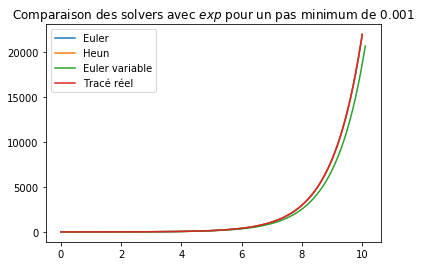

Mesure du rapport suivant : moyenne des erreurs à chaque points calculés / temps d'éxécution :
    - Euler classique :
        Temps = 0.027896881103515625s
        Erreur moyenne= 35109966.04875616
        Rapport = 1258562414.8619082 Erreurs.s^-1
    - Heun :
        Temps = 0.04790544509887695s
        Erreur moyenne= 35191011.10004231
        Rapport = 734593135.0268843 Erreurs.s^-1
    - Euler Variable :
        Temps = 0.00996541976928711s
        Erreur moyenne= 373.34201332396714
        Rapport = 37463.75185063325 Erreurs.s^-1


In [71]:
#Exponentielle sur [0;5]
t0, x0, tf, dt = 0, np.array([1]), 10, 10**-3
from time import time
t1 = time()
T1, X1 = solve_euler_explicit(lambda x: x, x0, dt, tf)

t2 = time()
T2, X2 = solve_heun(lambda x: x, x0, dt, tf)

t3 = time()
T3, X3 = solve_ivp_euler_explicit_variable_step(lambda x: x, t0, x0, tf, dt, 100*dt, 0.1)
T3, X3 = T3[:,0],X3[0,:]
tfin = time()

plt.plot(T1,X1, label="Euler")
plt.plot(T2,X2, label="Heun")
plt.plot(T3,X3, label="Euler variable")
plt.plot(T1,np.exp(T1), label="Tracé réel")
plt.title(f"Comparaison des solvers avec $exp$ pour un pas minimum de {dt}")
plt.legend()
plt.show()

print("Mesure du rapport suivant : moyenne des erreurs à chaque points calculés / temps d'éxécution :")
print(f"    - Euler classique :")
print(f"        Temps = {t2-t1}s")
print(f"        Erreur moyenne= {sum(abs(np.exp(T1)-X1))/len(T1)}")
print(f"        Rapport = {sum(abs(np.exp(T1)-X1))/(t2-t1)/len(T1)} Erreurs.s^-1")
print(f"    - Heun :")
print(f"        Temps = {t3-t2}s")
print(f"        Erreur moyenne= {sum(abs(np.exp(T2)-X2))/len(T2)}")
print(f"        Rapport = {sum(abs(np.exp(T2)-X2))/(t3-t2)/len(T2)} Erreurs.s^-1")
print(f"    - Euler Variable :")
print(f"        Temps = {tfin-t3}s")
print(f"        Erreur moyenne= {sum(abs(np.exp(T3)-X3))/len(T3)}")
print(f"        Rapport = {sum(abs(np.exp(T3)-X3))/(tfin-t3)/len(T3)} Erreurs.s^-1")

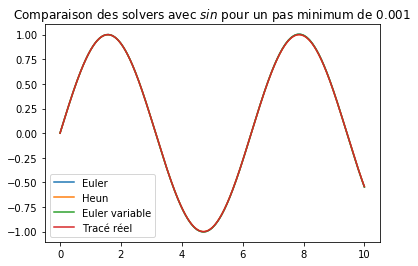

Mesure du rapport suivant : moyenne des erreurs à chaque points calculés / temps d'éxécution :
    - Euler classique :
        Temps = 0.04291391372680664s
        Erreur moyenne= 0.0014947764201662767
        Rapport = 51248.66038207868 Erreurs.s^-1
    - Heun :
        Temps = 0.0777888298034668s
        Erreur moyenne= 5.590497016915454e-07
        Rapport = 28272.452353666366 Erreurs.s^-1
    - Euler Variable :
        Temps = 0.09773945808410645s
        Erreur moyenne= 0.0019388729583370318
        Rapport = 23444.198925218512 Erreurs.s^-1


In [81]:
#Sinus sur [0;10]
f, t0, x0, tf, dt = lambda X: np.array((X[1],-X[0])), 0, np.array([0,1]), 10, 10**-3
from time import time
t1 = time()
T1, Y1 = solve_euler_explicit(f, x0, dt, tf)
X1 = Y1[:,0] #On ne récupère que la position

t2 = time()
T2, Y2 = solve_heun(f, x0, dt, tf)
X2 = Y2[:,0] #On ne récupère que la position

t3 = time()
T3, Y3 = solve_ivp_euler_explicit_variable_step(f, t0, x0, tf, dt, 100*dt, 10**-6)
T3, X3 = T3[:,0],Y3[0,:] #On ne récupère que la position
tfin = time()

plt.plot(T1,X1, label="Euler")
plt.plot(T2,X2, label="Heun")
plt.plot(T3,X3, label="Euler variable")
plt.plot(T1,np.sin(T1), label="Tracé réel")
plt.title(f"Comparaison des solvers avec $sin$ pour un pas minimum de {dt}")
plt.legend()
plt.show()

print("Mesure du rapport suivant : moyenne des erreurs à chaque points calculés / temps d'éxécution :")
print(f"    - Euler classique :")
print(f"        Temps = {t2-t1}s")
print(f"        Erreur moyenne= {sum(abs(np.sin(T1)-X1))/len(T1)}")
print(f"        Rapport = {sum(abs(np.exp(T1)-X1))/(t2-t1)/len(T1)} Erreurs.s^-1")
print(f"    - Heun :")
print(f"        Temps = {t3-t2}s")
print(f"        Erreur moyenne= {sum(abs(np.sin(T2)-X2))/len(T2)}")
print(f"        Rapport = {sum(abs(np.exp(T2)-X2))/(t3-t2)/len(T2)} Erreurs.s^-1")
print(f"    - Euler Variable :")
print(f"        Temps = {tfin-t3}s")
print(f"        Erreur moyenne= {sum(abs(np.sin(T3)-X3))/len(T3)}")
print(f"        Rapport = {sum(abs(np.exp(T3)-X3))/(tfin-t3)/len(T3)} Erreurs.s^-1")

#### Conclusion

Bien que les calculs suivants soient purement à titre indicatif (les valeurs choisis sont arbitraires), ils permettent de dégager une tendance.

On en déduit que, du moins dans ces cas particuliers, le schéma Euler à pas variable est généralement le plus rapide et fait largement moins d'erreur que les autres, à tel point qu'il présente malgré sa vitesse un rapport erreur/s inférieur aux autres.

C'est donc un algorithme performant dans la recherche de solutions approchés pour des équations différentiels.